<h1 align=center><font size="7"> COVID 19 Spread Insights for the US</font></h1>
<img src="covid-19-1.jpg" width=1250 align="center"></a>

# Table of Contents

* [Introduction](#introduction)
* [Business Problem](#business_problem)
* [Data Collection from sources](#data_collection)
* [Data Preparation](#data_preparation)
* [Data Analysis and Visualizations](#data_analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction <a name="introduction"></a>

The world has never experienced such a widespread pandemic like COVID-19. The uncertainty over this epidemic has marred nations. Fortunately, we live in an era, where unimaginable data is being generated every second. To tackle COVID -19 and make intelligent decisions, organizations are heavily relying data that is being generated and assembled by various sources in the world. More and more insights driven by machine learning algorithms and fast data processing has enabled to derive strategies and action plans. 


A platform to provide COVID 19 spread, deaths and recoveries at various levels (County, State, National) insights and visualizations help frontline working strategies to be streamlined. Targeted programmes like increase in testing centers, can be deployed to areas affected worse and with minimal healthcare facilities. 


# Business Problem <a name="business_problem"></a>

The attempt of this Capstone Project is to find and analyze COVID 19 data available in the public forum for the United States. Using Data Science Methodologies the outcome of this analysis we will try to answer these business questions. 

1. Which are the worst and least affected areas in the US? 
2. Can we classify Counties of any US State into High, Medium, Low risk based on their health care infrastructure?

### Target Audience
Mainly the project is targeted at helping Health Care Organizations and teams tackling the COVID19 pandemic from a planning perspective. It includes, Hospitals, State and National Healthcare officials and any organizations involved in COVID 19 frontline work. It helps them to make data-driven decisions. 

In addition to that this project is also aimed anyone who is directly or indirectly affected by COVID 19 who would like to get a perspective of the COVID 19 spread.  



# Data Collection from sources <a name="data_collection"></a>

The problem presented above would need the following data from available sources
1. Daily COVID 19 Cases reported data in the US. The John Hopkins University Center for Systems Science and Engineering Data repository will be used as source for this purpose. The GitHub page for JHU CSSE has multiple datasets in CSV format with active reported cases of COVID 19 throughout the world. The datasets are available here (https://github.com/CSSEGISandData/COVID-19).
2. For the classification problem, we will need data from 2 sources. 
   * To get a list of cities in each county we will be using a publicly available GitHub US cities and Counties database in CSV format. The dataset is available here (https://github.com/grammakov/USA-cities-and-states/blob/master/us_cities_states_counties.csv) 
   * To get Hospital venue information for each city, we would be accessing the Foursquare Database using the Foursquare Developer API. Foursquare has one of largest database of 105+ million places and is used by over 125,000 users worldwide. More info on Foursquare APIs can be found here (https://developer.foursquare.com/docs/places-api/)


### 1. JHU CSSE COVID-19 Dataset

For our project we will be usign the CSSE COVID 19 Daily Report, which is uploaded daily in the CSSE GitHub page. 

[Daily reports (csse_covid_19_daily_reports))](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports)

This table contains an aggregation of each USA State level data.

#### File naming convention
MM-DD-YYYY.csv in UTC.

#### Field description
* **FIPS**: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
* **Admin2**: County name. US only.
* **Province_State**: Province, state or dependency name.
* **Country_Region**: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
* **Last Update**: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
* **Lat and Long_**: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
* **Confirmed**: Confirmed cases include presumptive positive cases and probable cases, in accordance with CDC guidelines as of April 14.
* **Deaths**: Death totals in the US include confirmed and probable, in accordance with CDC guidelines as of April 14.
* **Recovered**: Recovered cases outside China are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
* **Active**: Active cases = total confirmed - total recovered - total deaths.
* **Incidence_Rate**: confirmed cases per 100,000 persons.
* **Case-Fatality Ratio (%)**: = number recorded deaths / number confirmed cases


In [321]:
#import all required libraries
import pandas as pd
import numpy as np
import datetime
import json
from urllib.request import urlopen

In [53]:
file_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

#todays file 
covid_file_today = file_path + datetime.date.today().strftime('%m-%d-%Y')+'.csv'

#yesterdays file 
covid_file_yesterday = file_path +(datetime.date.today() - datetime.timedelta(days = 1)).strftime('%m-%d-%Y')+'.csv'

#try reading todays file (latest) if not uploaded read the day before (yesterdays) file
try:
    df_covid = pd.read_csv(covid_file_today)
except:
    df_covid = pd.read_csv(covid_file_yesterday)

print(df_covid.shape)
df_covid.head()

(3824, 14)


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-17 04:34:50,34.223334,-82.461707,170,2,0,168.0,"Abbeville, South Carolina, US",693.113711,1.176471
1,22001.0,Acadia,Louisiana,US,2020-07-17 04:34:50,30.295065,-92.414197,1574,48,0,1526.0,"Acadia, Louisiana, US",2536.868402,3.049555
2,51001.0,Accomack,Virginia,US,2020-07-17 04:34:50,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-17 04:34:50,43.452658,-116.241552,5132,30,0,5102.0,"Ada, Idaho, US",1065.643383,0.584567
4,19001.0,Adair,Iowa,US,2020-07-17 04:34:50,41.330756,-94.471059,19,0,0,19.0,"Adair, Iowa, US",265.659955,0.000000


### 2. US Cities and Counties

This is a GitHib respository of US Cities, Counties and States. it contains a full list of US cities, states and counties (60k+ entries) formatted.

The file is available in pipe delimited format [here](https://github.com/grammakov/USA-cities-and-states/blob/master/us_cities_states_counties.csv)

#### File structure

>    City|State short name|State full name|County|City Alias Mixed Case

#### Example
>    Bronx|NY|New York|BRONX|University Heights


#### Additional processing required

This database does not have the coordinates for each city, we will have to use pygeocode to add coodinates to this file. This will be handled in the Data Cleansing section


In [69]:
county_city_file = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'

df_county_city = pd.read_csv(county_city_file,delimiter='|')

print(df_county_city.shape)
df_county_city.head()

(63211, 5)


,City,State short,State full,County,City alias
0,Holtsville,NY,New York,SUFFOLK,Internal Revenue Service
1,Holtsville,NY,New York,SUFFOLK,Holtsville
2,Adjuntas,PR,Puerto Rico,ADJUNTAS,URB San Joaquin
3,Adjuntas,PR,Puerto Rico,ADJUNTAS,Jard De Adjuntas
4,Adjuntas,PR,Puerto Rico,ADJUNTAS,Colinas Del Gigante


### 3. Foursquare Database
The Foursquare Database is used in the is projects to get the number of hospitals per county. Since County is a big geographical entity we will be searching the Foursquare API for hospital venues at city level and group them at county level later. 

The Foursquare Databse is accessed via the Foursquare Developer API which required credentials. The credentials have been previously setup and kept in secure python file, which is used by this project. 

We will be calling the API iteratively till we get all hospital venues from the API within the given distance. The maximum venues the API can fetch is 100, so we will fetch all venues by iteratively calling this API and increasing the offset each time.

We will be using the Foursquare Venue Search API. Credentials required to access the Foursquare API are 

* **CLIENT_ID**
* **CLIENT_SECRET**
* **VERSION**

#### Parameters Required for the Venue Search API

* **ll** = Latitude and longitude of the search location. This will be the Lat and Longitude of the city we wish to search for. 
* **radius** = currently we will set this as 20 miles (~32000 meters). Assumption here is that each city is at the max 40 miles wide. 
* **categoryId** = A comma separated list of categories to limit results to. In our case this will be list of categories for hospitals is 
   * Hospital - 4bf58dd8d48988d196941735
   * Hospital Ward - 58daa1558bbb0b01f18ec1f7
   * Medical Lab - 4f4531b14b9074f6e4fb0103
   * Urgent Care Center - 56aa371be4b08b9a8d573526
   * Doctor's Office - 4bf58dd8d48988d177941735
   * Emergency Room - 4bf58dd8d48988d194941735
   * Medical Center - 4bf58dd8d48988d104941735

#### Structure of the API

The API request URL would look like this

https://api.foursquare.com/v2/venues/search?client_id=XXXX&client_secret=XXXX&v=XXXX&ll=XX,XX&radius=32000&categoryId=LIST_OF_CATEGORIES


In [55]:
#setup credentials for the Foursquare API
import credentials

CLIENT_ID = credentials.CLIENT_ID
CLIENT_SECRET = credentials.CLIENT_SECRET
ACCESS_TOKEN = credentials.ACCESS_TOKEN
VERSION = datetime.date.today().strftime('%Y%m%d')
LIMIT = 500
RADIUS = 32000


# Data Preparation <a name="data_preparation"></a>

### COVID 19 Dataset

We start by renaming a few columns to make it more easy to process. 

But before that the dataset will be filtered only for US. 

In [56]:
df_covid = df_covid[df_covid['Country_Region'] == 'US']

df_covid.rename(columns = {'Long_':'Lng', 'Admin2' : 'County', 'Province_State':'State','Country_Region':'Country' }, inplace = True) 

print(df_covid.shape)
df_covid.head()

(3153, 14)


,FIPS,County,State,Country,Last_Update,Lat,Lng,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-17 04:34:50,34.223334,-82.461707,170,2,0,168.0,"Abbeville, South Carolina, US",693.113711,1.176471
1,22001.0,Acadia,Louisiana,US,2020-07-17 04:34:50,30.295065,-92.414197,1574,48,0,1526.0,"Acadia, Louisiana, US",2536.868402,3.049555
2,51001.0,Accomack,Virginia,US,2020-07-17 04:34:50,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-17 04:34:50,43.452658,-116.241552,5132,30,0,5102.0,"Ada, Idaho, US",1065.643383,0.584567
4,19001.0,Adair,Iowa,US,2020-07-17 04:34:50,41.330756,-94.471059,19,0,0,19.0,"Adair, Iowa, US",265.659955,0.000000


Here we will be cleansing the data. 

1. Remove rows with County as blanks or NaN
2. For the Lat, Lng columns we will remove the rows which contain NaN values
3. For the other metric columns, we will replace NaN with 0s
4. Remove duplicates
5. Reset Index

First let us check for nulls in all columns

In [59]:
for column in df_covid.columns:
    print(column + ' : ' + str(df_covid[column].isnull().sum()))

FIPS : 8
County : 0
State : 0
Country : 0
Last_Update : 0
Lat : 0
Lng : 0
Confirmed : 0
Deaths : 0
Recovered : 0
Active : 0
Combined_Key : 0
Incidence_Rate : 0
Case-Fatality_Ratio : 0


In [58]:
df_covid = df_covid[df_covid['County'].isna() == False ]
df_covid = df_covid[(df_covid['Lat'].isna() | df_covid['Lng'].isna()) == False ]
df_covid[df_covid.columns[5:]] = df_covid[df_covid.columns[5:]].fillna(0)
df_covid.drop_duplicates(inplace=True)
df_covid.reset_index(drop=True,inplace=True)


print(df_covid.shape)
df_covid.head()

(3088, 14)


,FIPS,County,State,Country,Last_Update,Lat,Lng,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-17 04:34:50,34.223334,-82.461707,170,2,0,168.0,"Abbeville, South Carolina, US",693.113711,1.176471
1,22001.0,Acadia,Louisiana,US,2020-07-17 04:34:50,30.295065,-92.414197,1574,48,0,1526.0,"Acadia, Louisiana, US",2536.868402,3.049555
2,51001.0,Accomack,Virginia,US,2020-07-17 04:34:50,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-17 04:34:50,43.452658,-116.241552,5132,30,0,5102.0,"Ada, Idaho, US",1065.643383,0.584567
4,19001.0,Adair,Iowa,US,2020-07-17 04:34:50,41.330756,-94.471059,19,0,0,19.0,"Adair, Iowa, US",265.659955,0.000000


### US Cities and Counties


We start by cleansing the Counties dataset removing unwanted columns. We will be removing the following 

* **City alias**

Next Step is to filter the datset for on California.

__Note that the coordinate information we will be adding only to California Cities as our Classification analysis is limited to California State__

In addition we will renaming a few columns to make it more easy to process. 


In [70]:
df_county_city = df_county_city.drop('City alias',axis=1)
df_county_city.rename(columns = {'State short':'STATE', 'State full' : 'STATE_FULL', 'County':'COUNTY','City':'CITY' }, inplace = True)
df_county_city.head()

,CITY,STATE,STATE_FULL,COUNTY
0,Holtsville,NY,New York,SUFFOLK
1,Holtsville,NY,New York,SUFFOLK
2,Adjuntas,PR,Puerto Rico,ADJUNTAS
3,Adjuntas,PR,Puerto Rico,ADJUNTAS
4,Adjuntas,PR,Puerto Rico,ADJUNTAS


In [71]:
df_county_city_ca = df_county_city[df_county_city['STATE'] == 'CA']

Here we will be cleansing the data. 

1. Remove rows with County as blanks or NaN
2. Remove duplicates
3. Reset index

First let us check for nulls in all columns

In [72]:
for column in df_county_city_ca.columns:
    print(column + ' : ' + str(df_county_city[column].isnull().sum()))

CITY : 1
STATE : 1
STATE_FULL : 1
COUNTY : 8


In [73]:
df_county_city_ca = df_county_city_ca[df_county_city_ca['COUNTY'].isna() == False ]
df_county_city_ca.drop_duplicates(inplace=True)
df_county_city_ca.reset_index(drop=True,inplace=True)

print(df_county_city_ca.shape)
df_county_city_ca.head()

(1250, 4)


,CITY,STATE,STATE_FULL,COUNTY
0,Los Angeles,CA,California,LOS ANGELES
1,WLA,CA,California,LOS ANGELES
2,West Hollywood,CA,California,LOS ANGELES
3,Dodgertown,CA,California,LOS ANGELES
4,Playa Vista,CA,California,LOS ANGELES


### Adding Lat and Long information to cities (for Classification)

Next we will add Latitude and Longitude infromation to the county data. For this we will be using the **geopy** Python library. 



We will run the geopy in loop for rows in the dataframe

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="COVID_Analysis")

for index, row in df_county_city_ca.iterrows():
    gc = geolocator.geocode(row[0] + ',CA,USA')
    if gc != None:
        df_county_city_ca.loc[index,'LAT'] = gc.latitude
        df_county_city_ca.loc[index,'LNG'] = gc.longitude

In [75]:
print(df_county_city_ca.shape)
df_county_city_ca.head()

(1250, 6)


,CITY,STATE,STATE_FULL,COUNTY,LAT,LNG
0,Los Angeles,CA,California,LOS ANGELES,34.053691,-118.242767
1,WLA,CA,California,LOS ANGELES,NaN,NaN
2,West Hollywood,CA,California,LOS ANGELES,34.092301,-118.369289
3,Dodgertown,CA,California,LOS ANGELES,NaN,NaN
4,Playa Vista,CA,California,LOS ANGELES,33.976010,-118.418165


* Remove all Null coordinates generated

* Remove all duplicate coordinates generated

* Reset Index

In [76]:
df_county_city_ca = df_county_city_ca[(df_county_city_ca['LAT'].isna() | df_county_city_ca['LNG'].isna()) == False ]
df_county_city_ca.drop_duplicates(['LAT','LNG'],inplace=True)
df_county_city_ca.reset_index(drop=True,inplace=True)

print(df_county_city_ca.shape)
df_county_city_ca.head()

(1241, 6)


,CITY,STATE,STATE_FULL,COUNTY,LAT,LNG
0,Los Angeles,CA,California,LOS ANGELES,34.053691,-118.242767
1,West Hollywood,CA,California,LOS ANGELES,34.092301,-118.369289
2,Playa Vista,CA,California,LOS ANGELES,33.976010,-118.418165
3,LA,CA,California,LOS ANGELES,36.701463,-118.755997
4,Bell Gardens,CA,California,LOS ANGELES,33.969456,-118.150395


### Getting Hospital numbers from FourSquare

The Foursquare Database is used in the is projects to get the number of hospitals per county. Since County is a big geographical entity we will be searching the Foursquare API for hospital venues at city level and group them at county level.

We will be runnign the FourSquare API in loop for all the rows in df_county_city_ca dataset below

As discussed before we weill be only searching for the following categories.

   * Hospital - 4bf58dd8d48988d196941735
   * Hospital Ward - 58daa1558bbb0b01f18ec1f7
   * Medical Lab - 4f4531b14b9074f6e4fb0103
   * Urgent Care Center - 56aa371be4b08b9a8d573526
   * Doctor's Office - 4bf58dd8d48988d177941735
   * Emergency Room - 4bf58dd8d48988d194941735
   * Medical Center - 4bf58dd8d48988d104941735


In [ ]:
import requests

categorys = '4bf58dd8d48988d196941735,58daa1558bbb0b01f18ec1f7,4f4531b14b9074f6e4fb0103,56aa371be4b08b9a8d573526,4bf58dd8d48988d177941735,4bf58dd8d48988d194941735,4bf58dd8d48988d104941735'

ca_hospitals = []

for index, row in df_county_city_ca.iterrows():
    lat = row['LAT']
    long = row['LNG']
    print(index)
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
          CLIENT_ID, 
          CLIENT_SECRET, 
          VERSION, 
          lat, 
          long, 
          RADIUS, 
          categorys)
    
    venues = requests.get(url).json()["response"]['venues']
    for venue in venues:
        ca_hospitals.append([row['CITY'],row['COUNTY'],row['STATE_FULL'],row['LAT'], row['LNG'], venue['id'],venue['name'],venue['location']['lat'],venue['location']['lng']])

In [79]:
df_ca_hospitals = pd.DataFrame(ca_hospitals)
df_ca_hospitals.columns = ['CITY', 'COUNTY', 'STATE','LAT', 'LNG', 'HOSPITAL_ID', 'HOSPITAL_NAME','HOSPITAL_LAT','HOSPITAL_LNG']
print(df_ca_hospitals.shape)
df_ca_hospitals.head()

(30389, 9)


,CITY,COUNTY,STATE,LAT,LNG,HOSPITAL_ID,HOSPITAL_NAME,HOSPITAL_LAT,HOSPITAL_LNG
0,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,5cf29a74d807ee002c0be6ae,Urology Associates Medical Group,34.158362,-118.329784
1,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,4b9e78e2f964a520e2e636e3,Planned Parenthood,34.023716,-118.275724
2,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,5ee1238202f7c56f3ca0be09,Dodger Stadium COVID-19 Testing,34.073057,-118.245511
3,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,5277ae8311d2f7103ce0a3f3,Methodist Hospital of Southern California - Su...,34.135133,-118.042098
4,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,4b399f6ef964a520325e25e3,Torrance Memorial Medical Center,33.811916,-118.343495


* Remove all duplicate coordinates generated

* Reset Index

In [80]:
df_ca_hospitals.drop_duplicates(['STATE','COUNTY', 'HOSPITAL_ID'],inplace=True)
df_ca_hospitals.reset_index(drop=True,inplace=True)

print(df_ca_hospitals.shape)
df_ca_hospitals.head()

(6966, 9)


,CITY,COUNTY,STATE,LAT,LNG,HOSPITAL_ID,HOSPITAL_NAME,HOSPITAL_LAT,HOSPITAL_LNG
0,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,5cf29a74d807ee002c0be6ae,Urology Associates Medical Group,34.158362,-118.329784
1,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,4b9e78e2f964a520e2e636e3,Planned Parenthood,34.023716,-118.275724
2,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,5ee1238202f7c56f3ca0be09,Dodger Stadium COVID-19 Testing,34.073057,-118.245511
3,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,5277ae8311d2f7103ce0a3f3,Methodist Hospital of Southern California - Su...,34.135133,-118.042098
4,Los Angeles,LOS ANGELES,California,34.053691,-118.242767,4b399f6ef964a520325e25e3,Torrance Memorial Medical Center,33.811916,-118.343495


Now we have all the hospital details at city levels. Now we need to group the results at County level to get the number hospitals per County. 

In [82]:
df_ca_hospitals_grouped = df_ca_hospitals[['COUNTY','HOSPITAL_ID']].groupby(['COUNTY'],as_index=False).count()
print(df_ca_hospitals_grouped.shape)
df_ca_hospitals_grouped.head()

(58, 2)


,COUNTY,HOSPITAL_ID
0,ALAMEDA,79
1,ALPINE,36
2,AMADOR,106
3,BUTTE,71
4,CALAVERAS,75


#### Merge the County grouped dataset to the main COVID 19 dataset (filtered on CA) to add the hospital count for each county. This will be our final dataset that we will use to gain insights thru classification. 

Here we are doing

1. Filter for California
2. Convert County column to uppercase
3. Join the filtered COVID dataset to County Dataset
4. Reset index
5. Add GEO_ID column for visualization purposes

In [90]:
df_covid_ca_final = df_covid[df_covid['State'] == 'California']
df_covid_ca_final['County'] = df_covid_ca_final['County'].apply(lambda x : x.upper())
df_covid_ca_final = df_covid_ca_final.set_index('County').join(df_ca_hospitals_grouped.set_index('COUNTY'))
df_covid_ca_final.rename(columns = {'HOSPITAL_ID' : 'HOSPITAL_COUNT'},inplace=True)
df_covid_ca_final.reset_index(inplace=True)

df_covid_ca_final.dropna(subset=['FIPS'],inplace=True)
df_covid_ca_final['GEO_ID'] = '0500000US' + df_covid_ca_final['FIPS'].astype('int32',errors='ignore').apply(lambda x: str(int(x)).zfill(5))

print(df_covid_ca_final.shape)
df_covid_ca_final.head()

(57, 15)


c:\rajesh\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,FIPS,State,Country,Last_Update,Lat,Lng,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,HOSPITAL_COUNT
0,ALAMEDA,6001.0,California,US,2020-07-17 04:34:50,37.646294,-121.892927,8627,154,0,8473.0,"Alameda, California, US",516.176049,1.785093,79
1,ALPINE,6003.0,California,US,2020-07-17 04:34:50,38.596786,-119.822359,2,0,0,2.0,"Alpine, California, US",177.147919,0.000000,36
2,AMADOR,6005.0,California,US,2020-07-17 04:34:50,38.445831,-120.656960,49,0,0,49.0,"Amador, California, US",123.264238,0.000000,106
3,BUTTE,6007.0,California,US,2020-07-17 04:34:50,39.667278,-121.600525,487,4,0,483.0,"Butte, California, US",222.185724,0.821355,71
4,CALAVERAS,6009.0,California,US,2020-07-17 04:34:50,38.205371,-120.552913,75,0,0,75.0,"Calaveras, California, US",163.380895,0.000000,75


### This marks the end of the Data Preparation. So now we have 2 datasets that we will be using for our analysis and insights.

1. **df_covid** = Master Dataset with all the COVID cases data for the US
2. **df_covid_ca_final** = Filtered for only California with Hospital info added. This will be used for classification. 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [288]:
df_covid.head(3)

,FIPS,County,State,Country,Last_Update,Lat,Lng,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-17 04:34:50,34.223334,-82.461707,170,2,0,168.0,"Abbeville, South Carolina, US",693.113711,1.176471
1,22001.0,Acadia,Louisiana,US,2020-07-17 04:34:50,30.295065,-92.414197,1574,48,0,1526.0,"Acadia, Louisiana, US",2536.868402,3.049555
2,51001.0,Accomack,Virginia,US,2020-07-17 04:34:50,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713


In [356]:
df_covid_ca_final.head(5)

,County,FIPS,State,Country,Last_Update,Lat,Lng,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,HOSPITAL_COUNT,GEO_ID
0,ALAMEDA,6001.0,California,US,2020-07-17 04:34:50,37.646294,-121.892927,8627,154,0,8473.0,"Alameda, California, US",516.176049,1.785093,79,0500000US06001
1,ALPINE,6003.0,California,US,2020-07-17 04:34:50,38.596786,-119.822359,2,0,0,2.0,"Alpine, California, US",177.147919,0.000000,36,0500000US06003
2,AMADOR,6005.0,California,US,2020-07-17 04:34:50,38.445831,-120.656960,49,0,0,49.0,"Amador, California, US",123.264238,0.000000,106,0500000US06005
3,BUTTE,6007.0,California,US,2020-07-17 04:34:50,39.667278,-121.600525,487,4,0,483.0,"Butte, California, US",222.185724,0.821355,71,0500000US06007
4,CALAVERAS,6009.0,California,US,2020-07-17 04:34:50,38.205371,-120.552913,75,0,0,75.0,"Calaveras, California, US",163.380895,0.000000,75,0500000US06009


# Data Analysis and Visualizations <a name="data_analysis"></a>

In this section we will focus on analysing and visulizing the prepared COVID 19 spread data. We will start by 

1. Finding out the top 10 states with the largest number of COVID Confirmed cases. Visualize the same.
2. Classify Counties based on the Number of cases Confirmed and Deaths in counties in CA vs the number of hospitals the risk level is assesssed. 


#### Finding out the top 10 states with the largest number of COVID Confirmed cases. Plot the same in different charts.

Let us start by grouping the COVID Dataset by State
Lets create grouped dataframes for each metric by ***State*** for ***'Confirmed' 'Deaths' 'Active' 'Case-Fatality_Ratio' 'Incidence_Rate'***

In [290]:
df_covid_states_confirmed = df_covid[['State','Confirmed']].groupby(['State']).sum()
df_covid_states_death = df_covid[['State','Deaths']].groupby(['State']).sum()
df_covid_states_fatality = df_covid[['State','Case-Fatality_Ratio']].groupby(['State']).sum()
df_covid_states_active = df_covid[['State','Active']].groupby(['State']).sum()

df_covid_states_incidence = df_covid[['State','Incidence_Rate']].groupby(['State'],as_index=False).mean()


Here we ill be grouping the ***Confirmed' 'Deaths' 'Active' 'Case-Fatality_Ratio'*** dataframes to the __Top 10__ and __Other States__

In [291]:
N = 10

s = df_covid_states_confirmed.sort_values(by=['Confirmed'],ascending=False)
df_covid_states_confirmed_Top_10 = s.iloc[:N]
df_covid_states_confirmed_Top_10.loc['Other States'] = s.iloc[N:].sum()


s = df_covid_states_death.sort_values(by=['Deaths'],ascending=False)
df_covid_states_death_Top_10 = s.iloc[:N]
df_covid_states_death_Top_10.loc['Other States'] = s.iloc[N:].sum()


s = df_covid_states_fatality.sort_values(by=['Case-Fatality_Ratio'],ascending=False)
df_covid_states_fatality_Top_10 = s.iloc[:N]
df_covid_states_fatality_Top_10.loc['Other States'] = s.iloc[N:].sum()


s = df_covid_states_active.sort_values(by=['Active'],ascending=False)
df_covid_states_active_Top_10 = s.iloc[:N]
df_covid_states_active_Top_10.loc['Other States'] = s.iloc[N:].sum()


df_covid_states_incidence_dict = df_covid_states_incidence.set_index('State')['Incidence_Rate']

c:\rajesh\python\python37\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


We will be plotting 4 pie charts showing the Confirmed, Active, Deaths and Fatality Ratios by state.

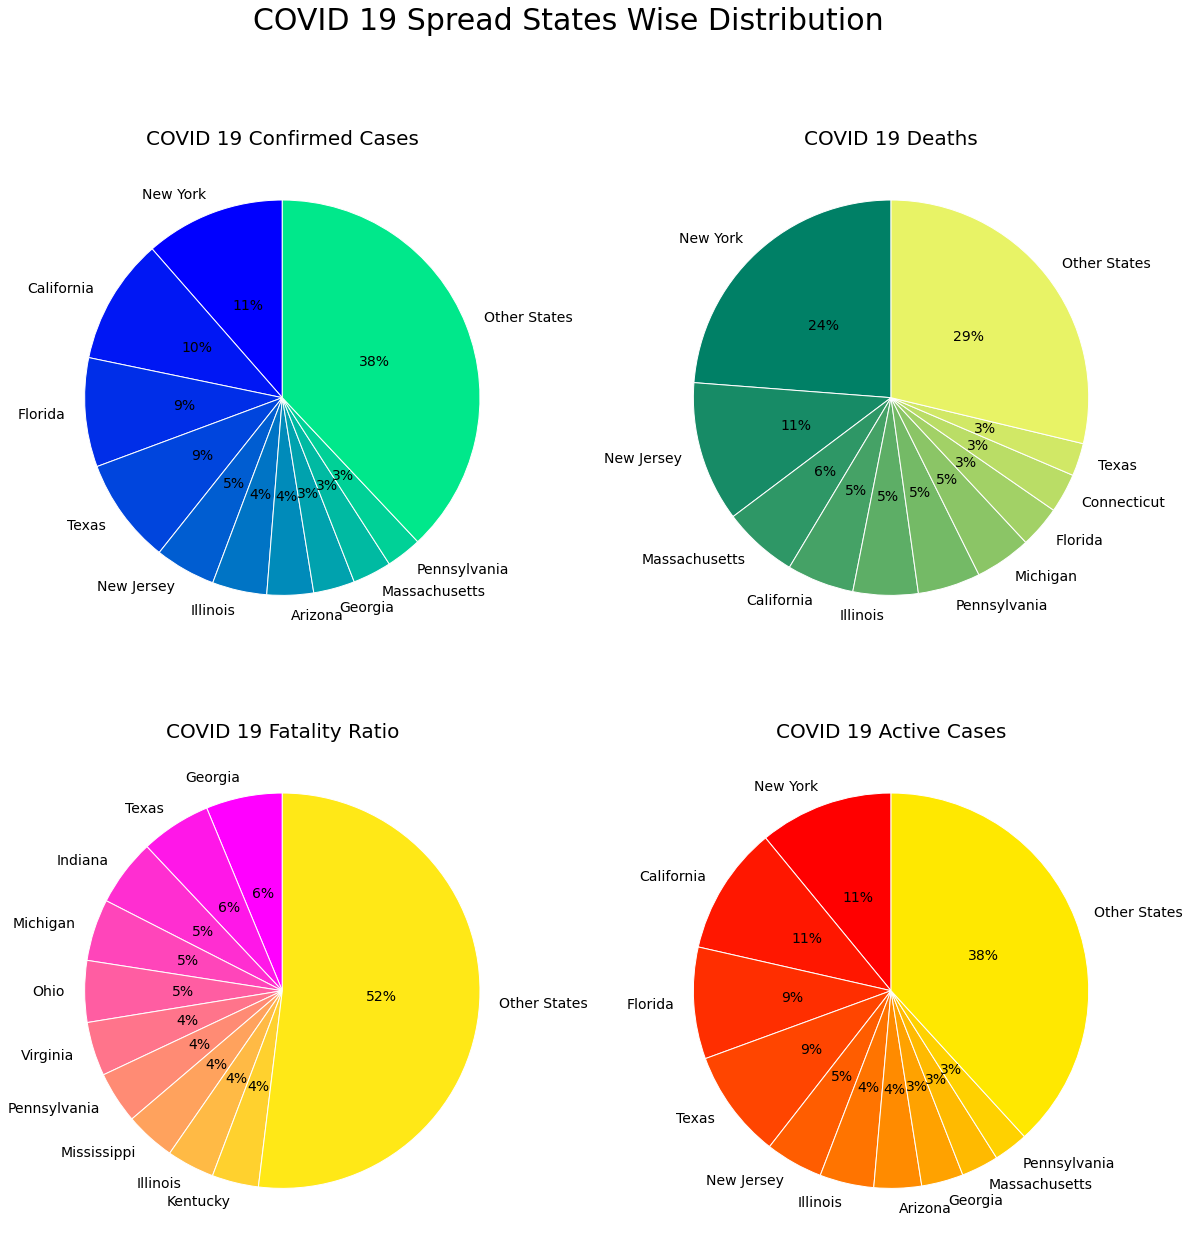

In [358]:
from matplotlib import cm
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
fig.suptitle('COVID 19 Spread States Wise Distribution',fontsize=30)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

df = df_covid_states_confirmed_Top_10
dimension = 'Confirmed'

df[dimension].plot(kind='pie',
                   colors=cm.winter(np.arange(df.shape[0])/df.shape[0]),
                   autopct='%1.0f%%',pctdistance=0.5,textprops={'fontsize': 14,'color':'black'},
                   startangle=90,shadow=False,ax=ax1,
                   wedgeprops={"edgecolor":"w",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
ax1.set_title('COVID 19 Confirmed Cases',fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('')

df = df_covid_states_death_Top_10
dimension = 'Deaths'

df[dimension].plot(kind='pie',
                   colors=cm.summer(np.arange(df.shape[0])/df.shape[0]),
                   autopct='%1.0f%%',pctdistance=0.5,textprops={'fontsize': 14,'color':'black'},
                   startangle=90,shadow=False,ax=ax2,
                   wedgeprops={"edgecolor":"w",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
ax2.set_title('COVID 19 Deaths',fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('')


df = df_covid_states_fatality_Top_10
dimension = 'Case-Fatality_Ratio'

df[dimension].plot(kind='pie',
                   colors=cm.spring(np.arange(df.shape[0])/df.shape[0]),
                   autopct='%1.0f%%',pctdistance=0.5,textprops={'fontsize': 14,'color':'black'},
                   startangle=90,shadow=False,ax=ax3,
                   wedgeprops={"edgecolor":"w",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
ax3.set_title('COVID 19 Fatality Ratio',fontsize=20)
ax3.set_xlabel('')
ax3.set_ylabel('')


df = df_covid_states_active_Top_10
dimension = 'Active'

df[dimension].plot(kind='pie',
                   colors=cm.autumn(np.arange(df.shape[0])/df.shape[0]),
                   autopct='%1.0f%%',pctdistance=0.5,textprops={'fontsize': 14,'color':'black'},
                   startangle=90,shadow=False,ax=ax4,
                   wedgeprops={"edgecolor":"w",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
ax4.set_title('COVID 19 Active Cases',fontsize=20)
ax4.set_xlabel('')
ax4.set_ylabel('')


#plt.show()

plt.savefig('COVID19_Spread_States.png')

Next we wil be visualizing the Incidence Rate for each State in a Choropleth map. 

We start by loading the map file for US States and create a GeoDataFrame

In [325]:
#GeoPandas library is needed for  
import geopandas as gpd
us_states_geo = json.load(urlopen('https://raw.githubusercontent.com/rajesh1980/Maps/master/US_States.json'))
df_us_states_geo = gpd.GeoDataFrame.from_features(us_states_geo,crs='EPSG:4326')
df_us_states_geo = df_us_states_geo.join(df_covid_states_incidence.set_index('State'),on='name')
print(df_us_states_geo.shape)
df_us_states_geo.head()


(51, 3)


,geometry,name,Incidence_Rate
0,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,1483.211189
1,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",Alaska,166.169871
2,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",Arizona,1971.045249
3,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,1024.134916
4,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,628.540952


Here we will plot the Map of United States with the States highlighted accordign to their Incidence Rates

In [361]:
from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
import branca.colormap as cm

m = folium.Map([43, -100], tiles='cartodbpositron', zoom_start=4)
color_map = cm.linear.YlOrBr_04.to_step(6,
               data=[10,20,30,40,50, 60, 70, 80, 90, 95, 100],
               method='quantiles',
               round_method='int').scale(df_covid_states_incidence['Incidence_Rate'].min(),df_covid_states_incidence['Incidence_Rate'].max())

popup = GeoJsonPopup(
    fields=['name','Incidence_Rate'],
    aliases=['State',"Incidence Rate"],
    localize=True,
    labels=True,
    style="background-color: white;",
)

tooltip = GeoJsonTooltip(
    fields=['name','Incidence_Rate'],
    aliases=["State:", "Incidence Rate"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


folium.GeoJson(
    df_us_states_geo,
    style_function=lambda x: {
        'fillColor': color_map(x['properties']['Incidence_Rate']),
        'fillOpacity' : 0.7, 
        'color': 'black',
        'weight': 0.8},
    highlight_function=lambda x: {'weight':3, 'color':'black'},
        tooltip=tooltip,
        popup=popup

).add_to(m)


color_map.caption = 'Incidence Rate per 100000 people'
m.add_child(color_map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>COVID Incidence Rate Across United States</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
m


From the Map above it is evident that States Arizona, Lousiana, DC, Pennsylvania are at the top in Incidence Rates. 

#### Classify Counties based on the Number of cases Confirmed and Deaths in counties in CA vs the number of hospitals the risk level is assesssed. 

We start by loading the Us County Map and creating a Geo DataFrame. Thn we will join the GeoDataFrame with the COVID County Dataframe for mapping. 

In [327]:
import geopandas as gpd
us_counties_geo = json.load(urlopen('https://raw.githubusercontent.com/rajesh1980/Maps/master/US_Counties.json'))

df_us_counties_geo = gpd.GeoDataFrame.from_features(us_counties_geo,crs='EPSG:4326')

df_covid_ca_geo = df_us_counties_geo.join(df_covid_ca_final.set_index('GEO_ID'),on='GEO_ID', rsuffix='_other', how='inner')
df_covid_ca_geo = df_covid_ca_geo.drop('County_other',axis=1)
df_covid_ca_geo.reset_index(drop=True, inplace=True)
print(df_covid_ca_geo.shape)
df_covid_ca_geo.head()

(57, 21)


,geometry,GEO_ID,STATE,County,NAME,LSAD,CENSUSAREA,FIPS,State,Country,...,Lat,Lng,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,HOSPITAL_COUNT
0,"POLYGON ((-120.99550 38.22541, -121.02708 38.3...",0500000US06005,06,005,AMADOR,County,594.583,6005.0,California,US,...,38.445831,-120.656960,49,0,0,49.0,"Amador, California, US",123.264238,0.000000,106
1,"POLYGON ((-122.93765 39.79816, -122.04647 39.7...",0500000US06021,06,021,GLENN,County,1313.947,6021.0,California,US,...,39.598759,-122.393845,200,1,0,199.0,"Glenn, California, US",704.398972,0.500000,71
2,"POLYGON ((-122.62740 38.66751, -122.82159 38.8...",0500000US06033,06,033,LAKE,County,1256.464,6033.0,California,US,...,39.101243,-122.753624,137,1,0,136.0,"Lake, California, US",212.779176,0.729927,74
3,"POLYGON ((-120.38767 37.63336, -120.38733 37.6...",0500000US06043,06,043,MARIPOSA,County,1448.816,6043.0,California,US,...,37.579786,-119.907333,35,1,0,34.0,"Mariposa, California, US",203.452886,2.857143,78
4,"POLYGON ((-122.10328 38.51335, -122.08884 38.3...",0500000US06055,06,055,NAPA,County,748.362,6055.0,California,US,...,38.507358,-122.332839,578,4,0,574.0,"Napa, California, US",419.619003,0.692042,86


Here we will plot the Map of California with the Counties highlighted accordign to their Confirmed Cases

In [329]:
m = folium.Map([37, -121], tiles='stamentoner', zoom_start=6)

popup = GeoJsonPopup(
    fields=['NAME','Confirmed'],
    aliases=['County:',"Confirmed Cases:"],
    localize=True,
    labels=True,
    style="background-color: white;",
)

tooltip = GeoJsonTooltip(
    fields=['NAME','Confirmed'],
    aliases=["County:", "Confirmed Cases:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
    
folium.GeoJson(
    df_covid_ca_geo,
    style_function=lambda x: {
        'fillColor': 'white',
        'fillOpacity' : 0.7, 
        'color': 'black',
        'weight': 0.8},
    highlight_function=lambda x: {'weight':3, 'color':'black'},
    tooltip = tooltip,
    popup=popup
).add_to(m)



for index, row in df_covid_ca_geo.iterrows():
    folium.Circle(
      location=[row['Lat'], row['Lng']],
      radius=row['Confirmed']*0.5,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
    
title_html = '''
             <h3 align="center" style="font-size:20px"><b>COVID Confirmed Cases Across CA Counties</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
m

Here we will plot the Map of California with the Counties highlighted accordign to their Deaths

In [332]:
m = folium.Map([37, -121], tiles='stamentoner', zoom_start=6)

popup = GeoJsonPopup(
    fields=['NAME','Deaths'],
    aliases=['County:',"Deaths:"],
    localize=True,
    labels=True,
    style="background-color: white;",
)

tooltip = GeoJsonTooltip(
    fields=['NAME','Deaths'],
    aliases=["County:", "Deaths:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
    
folium.GeoJson(
    df_covid_ca_geo,
    style_function=lambda x: {
        'fillColor': 'white',
        'fillOpacity' : 0.7, 
        'color': 'black',
        'weight': 0.8},
    highlight_function=lambda x: {'weight':3, 'color':'black'},
    tooltip = tooltip,
    popup=popup
).add_to(m)



for index, row in df_covid_ca_geo.iterrows():
    folium.Circle(
      location=[row['Lat'], row['Lng']],
      radius=row['Deaths']*15,
      color='green',
      fill=True,
      fill_color='green'
   ).add_to(m)
    
title_html = '''
             <h3 align="center" style="font-size:20px"><b>COVID Deaths Across CA Counties</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
m

##### Counties Grouping based on Confirmed, Deaths and Hospitals (K Means Clustering) 

We start by finding the optimal K value for the KMeans Clustering using the __Elbow Method__

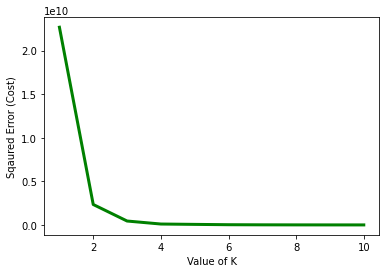

In [362]:
import matplotlib.pyplot as plt

cost =[] 
df_covid_ca_confirmed = df_covid_ca_geo[['Confirmed','Deaths','HOSPITAL_COUNT']]

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_covid_ca_confirmed) 
     
    # calculates squared error 
    # for the clustered points 
    cost.append(kmeans.inertia_)      
  
    # plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
#plt.show() # clear the plot 
plt.savefig('KMeasn_Elbow.png')
# the point of the elbow is the  
# most optimal value for choosing k 

It is is clear formt he figure above that a __K__ value of __4__ gives the optimal clustering. Hecne we will be setting __K = 4__

In [334]:
k = 4
df_covid_ca_confirmed = df_covid_ca_geo[['Confirmed','Deaths','HOSPITAL_COUNT']]
kmeans = KMeans(n_clusters=k, random_state=0).fit(df_covid_ca_confirmed)

# check cluster labels generated for each row in the dataframe
df_covid_ca_confirmed.insert(loc=0,column='KMeans Label',value=kmeans.labels_)
df_covid_ca_geo.insert(loc=0,column='KMeans Label',value=kmeans.labels_)
df_covid_ca_geo['KMeans Label'].value_counts()

0    37
3    15
2     4
1     1
Name: KMeans Label, dtype: int64

In [336]:
print(df_covid_ca_geo.shape)
df_covid_ca_geo.head()

(57, 22)


,KMeans Label,geometry,GEO_ID,STATE,County,NAME,LSAD,CENSUSAREA,FIPS,State,...,Lat,Lng,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,HOSPITAL_COUNT
0,0,"POLYGON ((-120.99550 38.22541, -121.02708 38.3...",0500000US06005,06,005,AMADOR,County,594.583,6005.0,California,...,38.445831,-120.656960,49,0,0,49.0,"Amador, California, US",123.264238,0.000000,106
1,0,"POLYGON ((-122.93765 39.79816, -122.04647 39.7...",0500000US06021,06,021,GLENN,County,1313.947,6021.0,California,...,39.598759,-122.393845,200,1,0,199.0,"Glenn, California, US",704.398972,0.500000,71
2,0,"POLYGON ((-122.62740 38.66751, -122.82159 38.8...",0500000US06033,06,033,LAKE,County,1256.464,6033.0,California,...,39.101243,-122.753624,137,1,0,136.0,"Lake, California, US",212.779176,0.729927,74
3,0,"POLYGON ((-120.38767 37.63336, -120.38733 37.6...",0500000US06043,06,043,MARIPOSA,County,1448.816,6043.0,California,...,37.579786,-119.907333,35,1,0,34.0,"Mariposa, California, US",203.452886,2.857143,78
4,0,"POLYGON ((-122.10328 38.51335, -122.08884 38.3...",0500000US06055,06,055,NAPA,County,748.362,6055.0,California,...,38.507358,-122.332839,578,4,0,574.0,"Napa, California, US",419.619003,0.692042,86


# Results and Discussion <a name="results"></a>

Now that we have finished all the processing and analysis of the data we can now view the results and start deriving insights. Generally visualizing the data in scatter plots gives us insights into the clustering.

We will highlight each county based on the classification label it is assigned to. For example Los Angeles is assigned as Label 1. We will be highlighting each label with a color. 

* Blue : 0
* Red : 1
* Yellow : 2
* Green : 3

In [355]:
m = folium.Map([37, -121], tiles='stamentoner', zoom_start=6)

color_map = cm.StepColormap(
    ['blue', 'red', 'yellow', 'green'],
    vmin=0, vmax=4,
    index=[0, 0.9, 1.9, 2.9, 3.9],
    caption='step'
)



popup = GeoJsonPopup(
    fields=['NAME','Confirmed','Deaths','HOSPITAL_COUNT'],
    aliases=["County:", "Confirmed Cases:","Deaths:",'No of Hospitals:'],
    localize=True,
    labels=True,
    style="background-color: white;",
)

tooltip = GeoJsonTooltip(
    fields=['NAME','Confirmed','Deaths','HOSPITAL_COUNT'],
    aliases=["County:", "Confirmed Cases:","Deaths:",'No of Hospitals:'],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
    
folium.GeoJson(
    df_covid_ca_geo,
    style_function=lambda x: {
        'fillColor': color_map(x['properties']['KMeans Label']),
        'fillOpacity' : 0.7, 
        'color': 'black',
        'weight': 0.8},
    highlight_function=lambda x: {'weight':3, 'color':'black'},
    tooltip = tooltip,
    popup=popup
).add_to(m)

color_map.caption = 'California CountiesRisk Classification'
m.add_child(color_map)
title_html = '''
             <h3 align="center" style="font-size:20px"><b>CA Counties Classified</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
m

Let us split the dataframe by the labels for analysis

In [301]:
df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == 0][['NAME','Confirmed','Deaths','HOSPITAL_COUNT']]

,NAME,Confirmed,Deaths,HOSPITAL_COUNT
0,AMADOR,49,0,106
1,GLENN,200,1,71
2,LAKE,137,1,74
3,MARIPOSA,35,1,78
4,NAPA,578,4,86
5,SHASTA,220,6,130
7,YUBA,236,3,98
8,ALPINE,2,0,36
9,BUTTE,487,4,71
10,MENDOCINO,165,1,63


In [302]:
df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == 1][['NAME','Confirmed','Deaths','HOSPITAL_COUNT']]

,NAME,Confirmed,Deaths,HOSPITAL_COUNT
46,LOS ANGELES,147678,3989,262


In [303]:
df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == 2][['NAME','Confirmed','Deaths','HOSPITAL_COUNT']]

,NAME,Confirmed,Deaths,HOSPITAL_COUNT
13,ORANGE,27904,466,136
14,RIVERSIDE,28177,585,211
16,SAN DIEGO,21855,465,253
48,SAN BERNARDINO,21468,310,413


In [304]:
df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == 3][['NAME','Confirmed','Deaths','HOSPITAL_COUNT']]

,NAME,Confirmed,Deaths,HOSPITAL_COUNT
6,STANISLAUS,5777,61,70
17,SAN FRANCISCO,4860,51,30
19,SAN MATEO,4333,114,70
20,SANTA BARBARA,4635,32,113
27,CONTRA COSTA,5233,93,110
29,IMPERIAL,8310,148,146
30,KERN,7074,105,301
37,SAN JOAQUIN,7680,81,97
39,TULARE,6480,161,169
40,MARIN,4078,41,138


Here we will be plotting the Confirmed and Deaths by Hospital Counts in scatter plots for better understanding

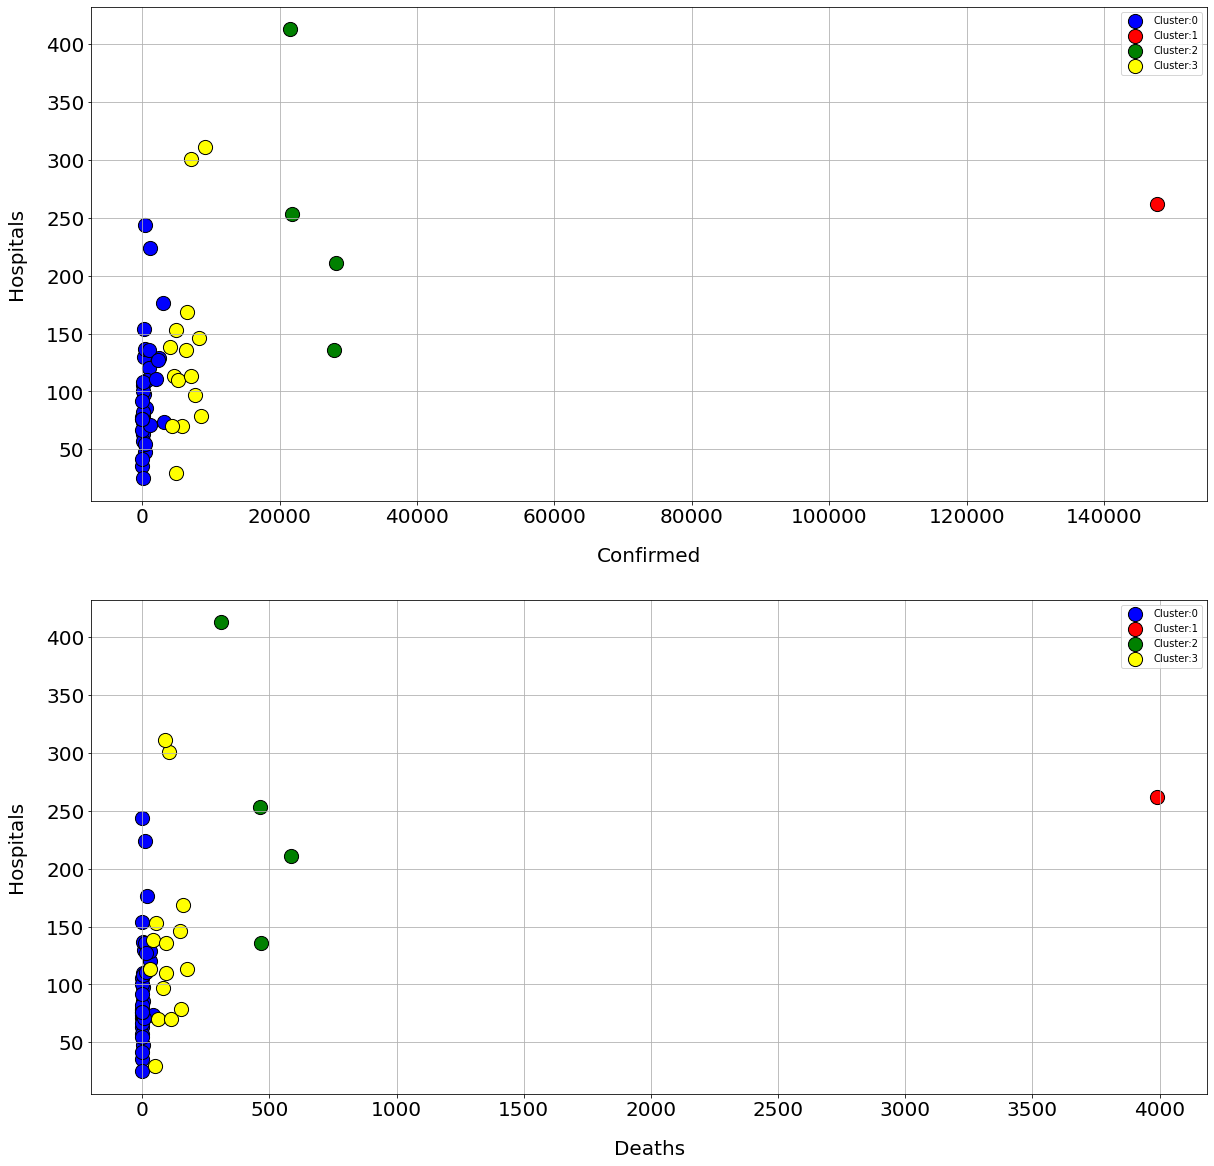

In [364]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


for k, c in zip((0,1,2,3),('blue','red','green','yellow')):
    ax1.scatter(df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['Confirmed'], 
                df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['HOSPITAL_COUNT'], 
                s=200,
                marker='o',
                color=c,label='Cluster:' + str(k),
                alpha=1,
                edgecolors='black')
ax1.set_xlabel('Confirmed',fontsize='20',labelpad=20)
ax1.set_ylabel('Hospitals',fontsize='20',labelpad=20)
ax1.tick_params(which='major', labelsize=20)
ax1.legend()
ax1.grid(True)

for k, c in zip((0,1,2,3),('blue','red','green','yellow')):
    ax2.scatter(df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['Deaths'], 
                df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['HOSPITAL_COUNT'], 
                s=200,
                marker='o',
                color=c,label='Cluster:' + str(k),
                alpha=1,
                edgecolors='black')
ax2.set_xlabel('Deaths',fontsize='20',labelpad=20)
ax2.set_ylabel('Hospitals',fontsize='20',labelpad=20)
ax2.tick_params(which='major', labelsize=20)
ax2.legend()
ax2.grid(True)

plt.savefig('Clusters_2d.png')

Here we will consolidately plot Confirmed, Deaths and Hosiptals Counts in a 3D Scatter plot for analysis

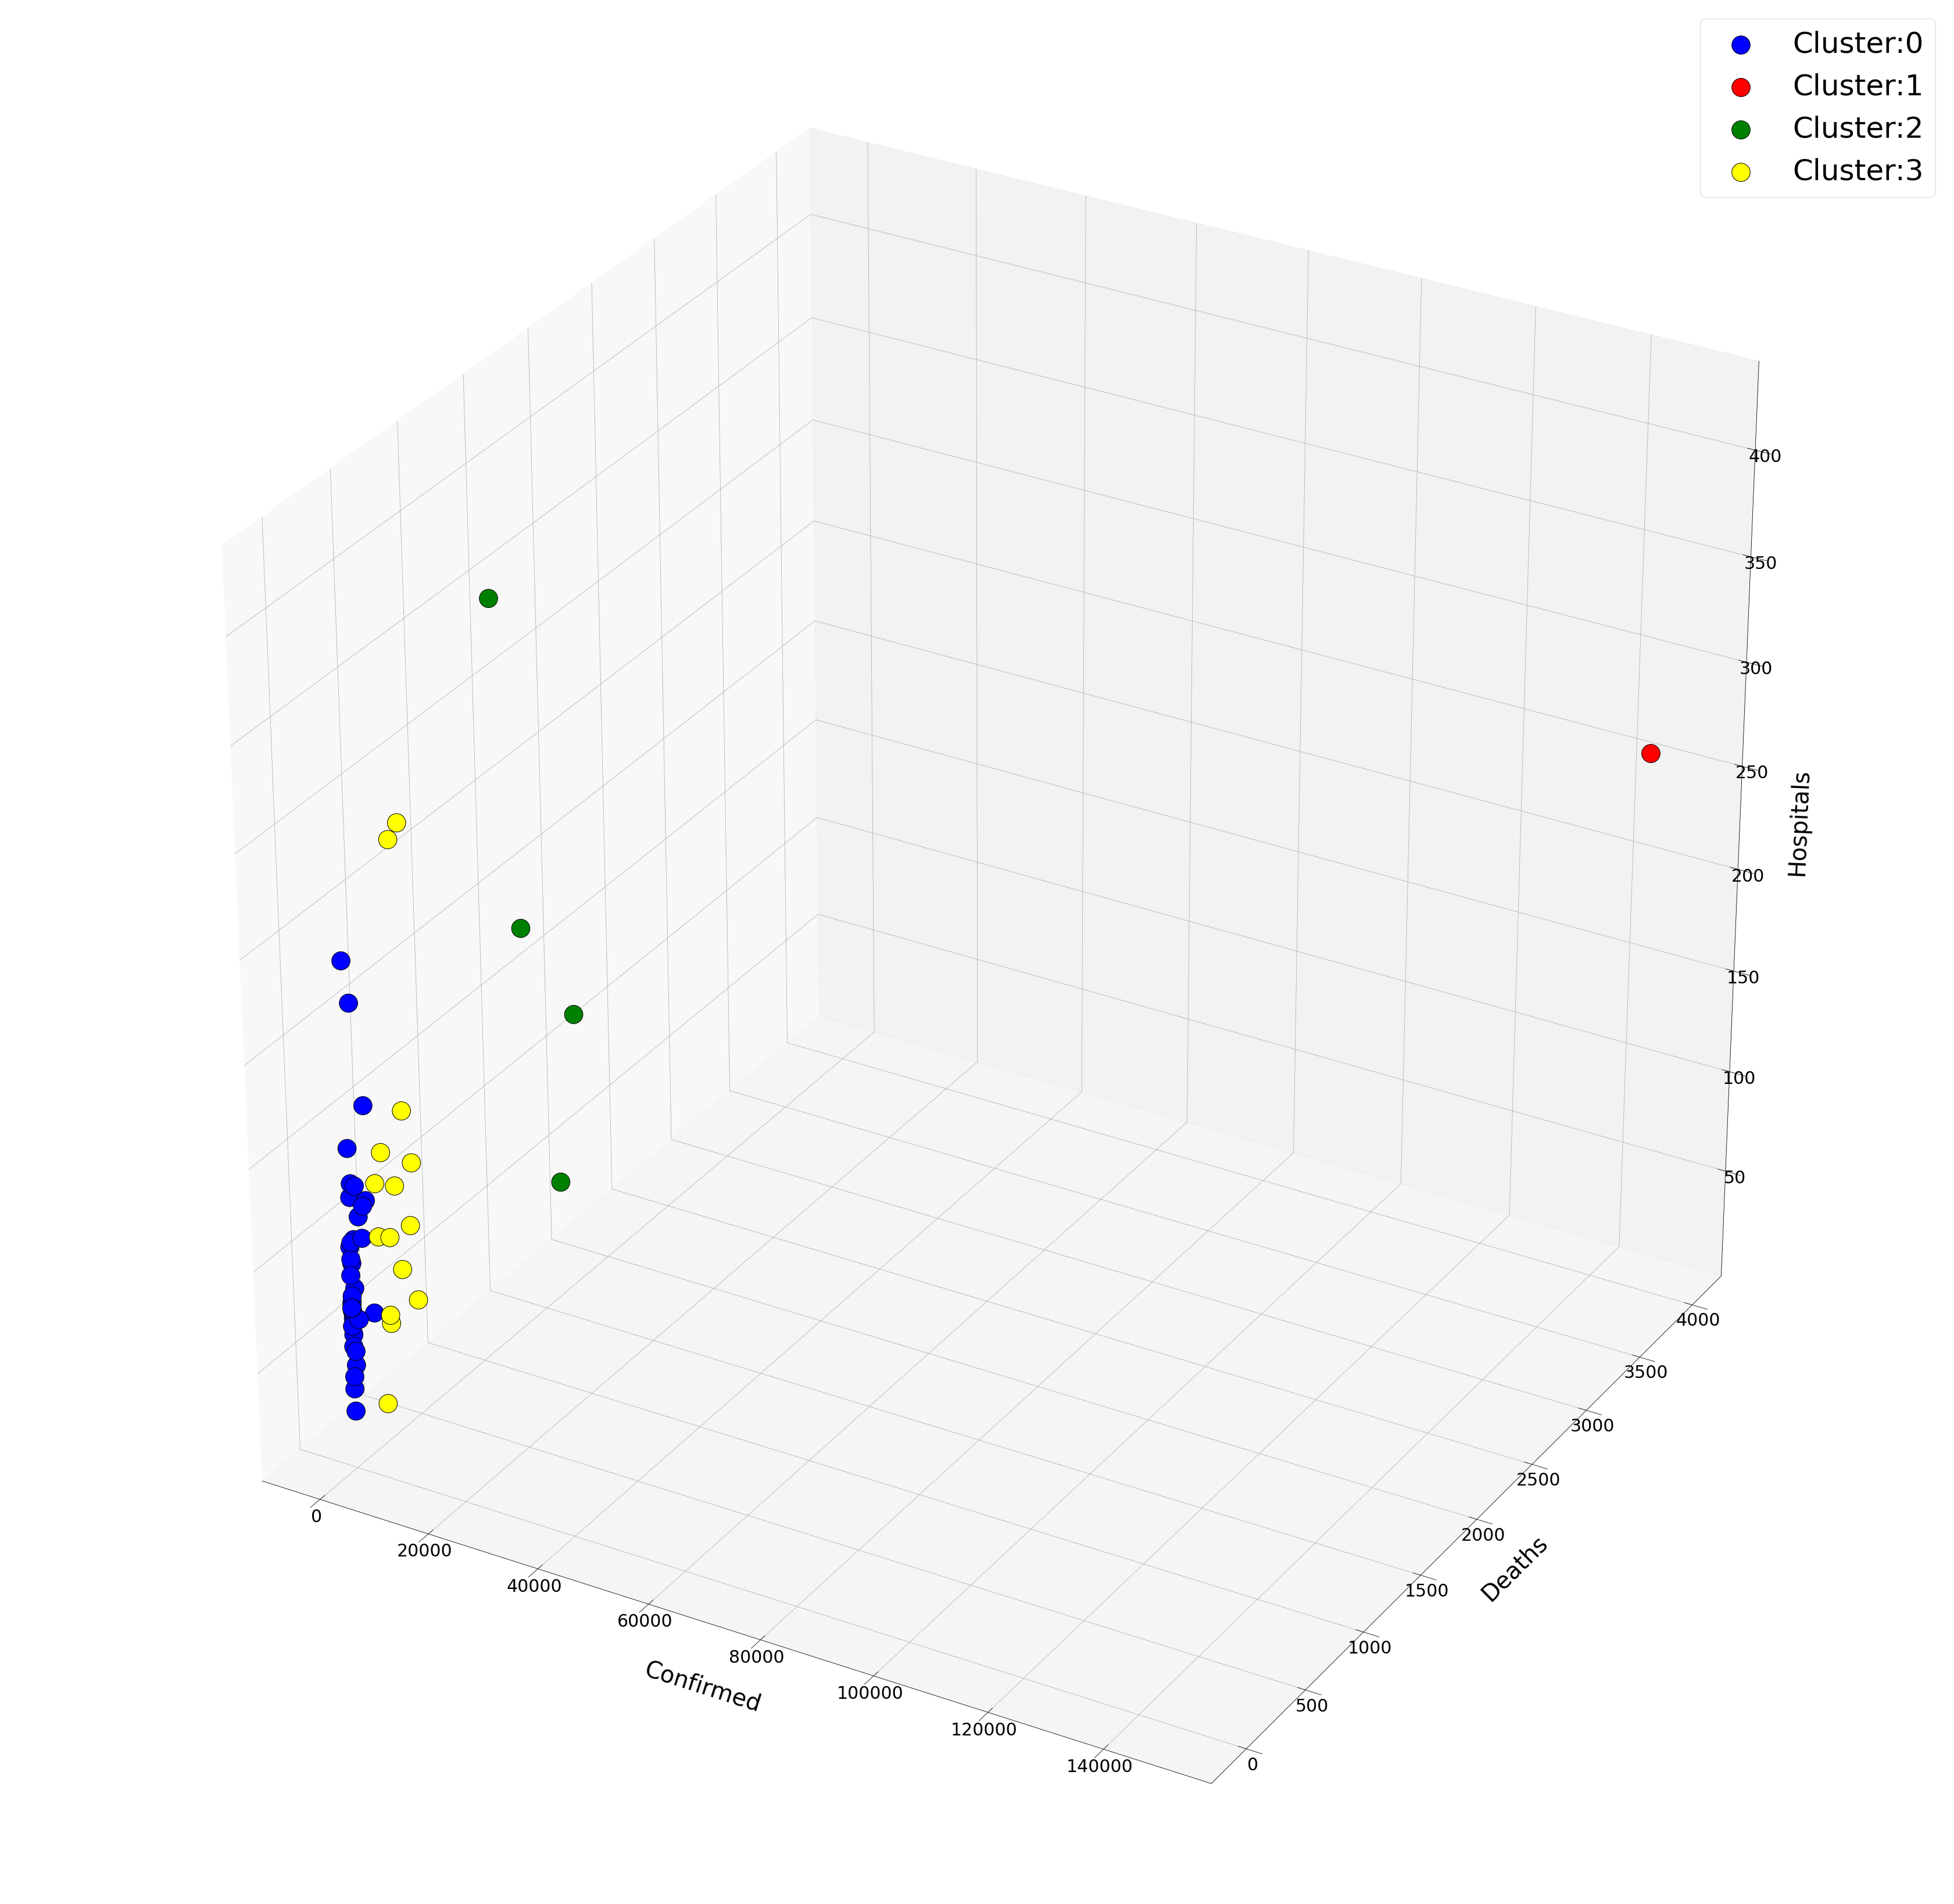

In [365]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(60,60))
ax = fig.add_subplot(111, projection='3d')

for k, c in zip((0,1,2,3),('blue','red','green','yellow')):
    ax.scatter(df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['Confirmed'], 
               df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['Deaths'], 
               df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['HOSPITAL_COUNT'], 
               s=1000,
               marker='o',
               color=c,label='Cluster:' + str(k),
               alpha=1,
               edgecolors='black')

ax.set_xlabel('Confirmed',fontsize='40',labelpad=50)
#ax.set_xticklabels(df_covid_ca_geo['Confirmed'],fontsize=30)
ax.set_ylabel('Deaths',fontsize='40',labelpad=50)
#ax.set_yticklabels(df_covid_ca_geo['Deaths'],fontsize=30)
ax.set_zlabel('Hospitals',fontsize='40',labelpad=50)
#ax.set_zticklabels(df_covid_ca_geo['HOSPITAL_COUNT'],fontsize=30)
ax.tick_params(which='major', labelsize=30)
ax.legend(loc=1, prop={'size': 50})
plt.savefig('Clusters_3d.png')

#### Insights Discussion

As you can see most of the Counties fall under __Cluster 0 (Blue)__. These are counties with the least number of Deaths and Confirmed Cases with a relatively large number of hospitals. So we can categeroize them into __Low Risk Counties__. __Cluster 1 (Red)__ seems to be an anomaly becasue of the extremely large count of Deaths and Confirmed case in the Los Angeles County. Due to its relatively average number of Hsopitals we will Los Angeles under __High Risk County__. __Cluster 3 (Yellow)__ Counties are little bit higher than __Cluster 0 (Blue)__ in terms of the COVID Cases with relatively the same spread of Hospitals as the Cluster 0. We will put them under __Below Average Risk__ Counties. __Cluster 2 (Green)__ is relatively thinly spread with only 4 Counties with extremely large COVID Cases reported and having large number of hospitals. Even thought it has large number hospitals the cases numbers are high and ence we will classify them into __Above Average Risk__ Counties. 

The below table represents the clusters classifications based on the discussion above

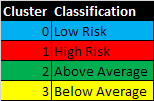

In [354]:
for k, r in zip([0,1,2,3],['LOW','HIGH','ABOVE AVG','BELOW AVG']):
    print('Counties with Risk Level {}'.format(r))
    print(df_covid_ca_geo[df_covid_ca_geo['KMeans Label'] == k]['NAME'].to_list())
    print('-----------------------------------')
    print('')

Counties with Risk Level LOW
['AMADOR', 'GLENN', 'LAKE', 'MARIPOSA', 'NAPA', 'SHASTA', 'YUBA', 'ALPINE', 'BUTTE', 'MENDOCINO', 'MONO', 'NEVADA', 'SAN BENITO', 'YOLO', 'SANTA CRUZ', 'SOLANO', 'SUTTER', 'TEHAMA', 'TUOLUMNE', 'CALAVERAS', 'DEL NORTE', 'KINGS', 'MADERA', 'COLUSA', 'INYO', 'MERCED', 'PLUMAS', 'SIERRA', 'MONTEREY', 'PLACER', 'HUMBOLDT', 'LASSEN', 'SAN LUIS OBISPO', 'SISKIYOU', 'SONOMA', 'TRINITY', 'EL DORADO']
-----------------------------------

Counties with Risk Level HIGH
['LOS ANGELES']
-----------------------------------

Counties with Risk Level ABOVE AVG
['ORANGE', 'RIVERSIDE', 'SAN DIEGO', 'SAN BERNARDINO']
-----------------------------------

Counties with Risk Level BELOW AVG
['STANISLAUS', 'SAN FRANCISCO', 'SAN MATEO', 'SANTA BARBARA', 'CONTRA COSTA', 'IMPERIAL', 'KERN', 'SAN JOAQUIN', 'TULARE', 'MARIN', 'FRESNO', 'SACRAMENTO', 'VENTURA', 'ALAMEDA', 'SANTA CLARA']
-----------------------------------

